# Black Body Radiation, Wien's Law

## Authors
B.W. Holwerda

## Learning Goals
* Black Body Radiation
* Wien's Law

## Keywords

## Companion Content
Chapter 1 in Ryden & Peterson

## Summary

Inspired by the notebooks by Michael Zindale and Dimitrios on Black Body radiation. Show the shape and characteristics of the Planck curve and the derived Wien's Law and Bolometric luminosity. 

https://zingale.github.io/computational_astrophysics/basics/diff-int/application-blackbody.html

https://github.com/astroDimitrios/Astronomy/blob/main/AstPy-005%20Solar%20Radiation/blackbodyCurves.py

<hr>



## Student Name and ID:



## Date:

<hr>

In [123]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["savefig.dpi"] = 150
rcParams["figure.dpi"] = 150
rcParams["font.size"] = 15

from astropy.coordinates import SkyCoord
from astropy import units as u

# Black Body Radiation

Black-body radiation is the thermal electromagnetic radiation within, or surrounding, a body in thermodynamic equilibrium with its environment, emitted by a black body (an idealized opaque, non-reflective body). It has a specific continuous spectrum that depends only on the body's temperature [wikipedia].
Most stars are not perfect black bodies but quite close for our purposes.
The **Planck function** describes the intensity of a blackbody:

$$ B_\lambda = {2hc^2\over \lambda^5} {1 \over exp\left({hc \over \lambda k_B T}\right) - 1 } $$

with units of energy / area / wavelength / steradian. This expresses how much energy one gets to an area (think telescope aperture) for a given wavelength over a certain piece of the sky. 

The function depends on the wavelength $\lambda$ where one measures and the tempertature $T$ of the object.

We want to integrate over all wavelengths to get an idea of the *Bolometric Luminosity* i.e. all the light emitted by an object. Integrating over $\lambda$ we would get:

$$ B = \int_0^\inf B_\lambda d\lambda $$

but this is easier to do if we use the dimensional quantity $x$:

$$ x = {hc \over \lambda k_B T} $$

which means

$$ dx = - {hc \over \lambda^2 k_B T} d\lambda = - {x^2 k_B T \over hc} d\lambda $$

which turns our integral into:

$$ B = {2(k_B T )^4 \over h^3 c^2} \int_)^\inf {x^3 \over e^x - 1} dx $$

Once we do integrate this (this is analytically posibble, we get:

$$ B = {\sigma T^4 \over \pi} $$

with the Stephan-Bolzmann constant defined as:

$$ \sigma \equiv {2k_B^4 \pi^5 \over 15 h3 c^2} $$



# Changing the Temperature

Below is an animation of the black body curve as it changes with temperature. Note that the animation uses logarithmic axes to plot the curve.

<video width="640" height="480" controls 
        src=https://zingale.github.io/astro_animations/_images/blackbody_wavelength.mp4 
        type=video/mp4> 
</video>

We define a function that takes wavelength in meters and temperature in Kelvin.

In [127]:

def BB(l,T):
    # define constants
    kb = 1.380649*10**(-23) # J/K
    c = 299792458 # m/s
    h = 6.62607015*10**(-34) # Js

    B = ((2.*h*c**2)/(l**5) ) * 1./(np.exp(h*c/(l*kb*T))-1)
    return B


### Exercise 1 -- Plot the Planck Curve

Plot the black body curve for a range of wavelengths for a T=5000 K object.

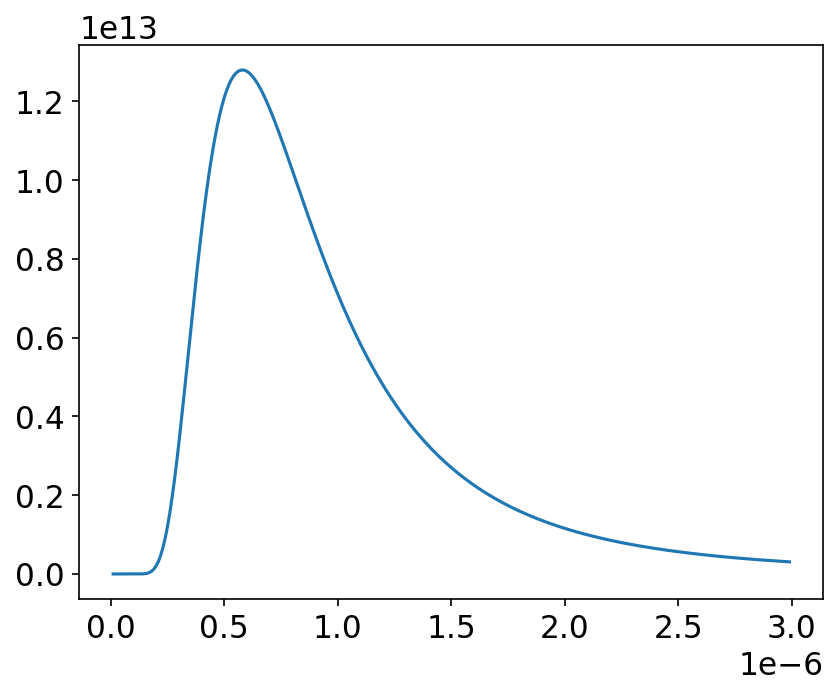

In [174]:
l = np.arange(0.01,3,0.01)*10**(-6) # in meters
# student work below


### Exercise 2 -- Plot the Planck Curve

You'll note that axes have a scientific notation subscript. It's better to perhaps use nano-meters (multiply the wavelength with $10^9$ before plotting and the y-axis by $10^{13}$. Modify the example below to show not just the T=4000, 5000 and 6000K. 

Text(0, 0.5, '$Spectral\\ Intensity\\ /\\ 10^{4}\\ Wsr^{-1}m^{-2}nm^{-1}$')

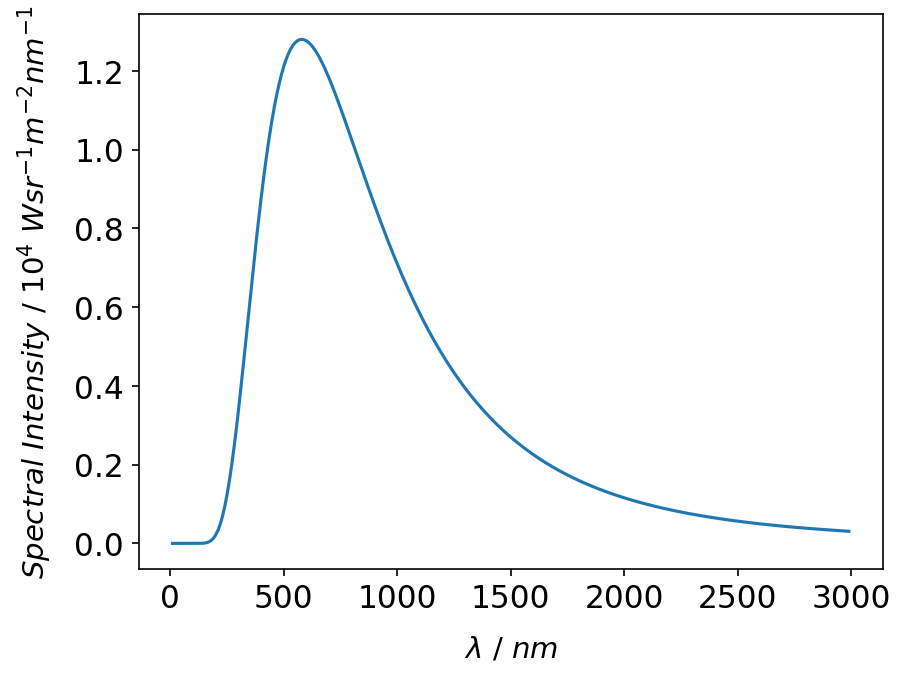

In [177]:
# student work below


# Wien's Law

The derivative of Planck Function gives us Wien's law for the wavelength where the peak occurs for a given temperature. This is expressed as:

$$ \lambda_{peak} = {b \over T} $$

where $b$ is Wien's constant. We define a function that will give the peak wavelength and the Intensity of the black body at the peak. 

In [136]:
def Wien(T):
    b = 2.897771955*10**(-3) # m K
    lpeak = b/T
    Bpeak = 2*h*c**2/lpeak**5 * 1./(np.exp(h*c/(lpeak*kb*T))-1)
    return lpeak,Bpeak
    

### Exercise 3 -- Wien's Law

Plot the black body curves for the temperatures T=4000,5000,6000 and add a black dot where the peak is using the function above. Modify the example below.

In [1]:
# student work below


### Exercise 4 -- Wien's Law

Use the function to calculate the peak wavelengths for a range of stellar temperatures (3000-10000K). Try to express the wavelength in nano-meters.

In [3]:
#student work below


### Exercise 5 -- Wien's Law

Of the above stellar temperatures, which peak in the optical regime (340-700nm)?

*student written answer here*

### Exercise 6 -- Logarithmic Scales

The animation at the beginning used logarithmic scales for both x and y-axes. You can quickly plot one or both axes by changing *plot* with *semilogy*, *semilogx*, or *loglog*.
Take the example in Assignment 2 and plot with each replacing the *plt.plot command. Which one is at least as clear as the linear plot we have been using above?


In [5]:
#student work below


*student written answer here - which of the plot options works just as well or better?*

# Exercise 7 -- Bolometric Luminosity

In order to get the full bolometric luminosity we would want to integrate over the Planck function. Computational integration is perhaps a little too much right now. For an example on how this is done see here: https://zingale.github.io/computational_astrophysics/basics/diff-int/application-blackbody.html

We are just going to use the numpy sum function to sum everything together for an approximation. This is done for a given temperature in the Bolometric function defined below. 

Plot the Bolometric luminosity for a series of temperature values from 500 to 10.000K. 



In [7]:

def Bolometric(T):
    l = np.arange(0.01, 3, 0.01)*10**-6 # steps of 0.01 micron from 0-3 micron
    Bl = BB(l,T) # Wsr^{-1}m^{-2}nm^{-1}$
    B = np.sum(Bl*0.01*10**-6)
    return B

# student work below



### Exercise 8 -- Comparing the Bolometric expression

Compare these values to the expression at the beginning of the assignment. HINT: plot the wavelength and bolometric output on a loglog scale. Are they on a line? It's a power law!

*student written answer here*

### Exercise 9 -- Comparing the Bolometric expression

Plot the temperature-bolometric intensity on a log-log scale. What do you notice about the T=500 point? 
It seems to be a little below a linear relation. We approximated the integration with a sum from 0 to 3000 nm. Since some of the T=500K flux seems to be missing, what does that tell you about that cool star's emission?

*student written answer here*

<hr>